# P2: 超啟發式演算法

In [1]:
from google.colab import drive
import random
import matplotlib.pyplot as plt
import math

## 讀檔
- CAPACITY: <font color="#fa0">const int</font>，背包空間
- OBJ_WEIGHT_ARR: <font color="#fa0">const array\<int></font>，物品重量
- OBJ_VALUE_ARR: <font color="#fa0">const array\<int></font>，物品價值
- ANS_ARR: <font color="#fa0">const array\<int></font>，正確解答

In [2]:
drive.mount('/content/drive')

f = open('/content/drive/MyDrive/awin/p2/p07_c.txt', 'r')
CAPACITY = int(f.read())
print('knapsack capacity: ' + str(CAPACITY))
f.close()

f = open('/content/drive/MyDrive/awin/p2/p07_w.txt', 'r')
OBJ_WEIGHT_ARR = []
for line in f.readlines():
  OBJ_WEIGHT_ARR.append(int(line))
print('weights of the objects: ' + str(OBJ_WEIGHT_ARR))
f.close()

f = open('/content/drive/MyDrive/awin/p2/p07_p.txt', 'r')
OBJ_VALUE_ARR = []
for line in f.readlines():
  OBJ_VALUE_ARR.append(int(line))
print('profits of each object: ' + str(OBJ_VALUE_ARR))
f.close()

f = open('/content/drive/MyDrive/awin/p2/p07_s.txt', 'r')
ANS_ARR = []
for line in f.readlines():
  ANS_ARR.append(int(line))
print('optimal selection of weights: ' + str(ANS_ARR))
f.close()

Mounted at /content/drive
knapsack capacity: 750
weights of the objects: [70, 73, 77, 80, 82, 87, 90, 94, 98, 106, 110, 113, 115, 118, 120]
profits of each object: [135, 139, 149, 150, 156, 163, 173, 184, 192, 201, 210, 214, 221, 229, 240]
optimal selection of weights: [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]


## 爬山演算法

### Predefined Variables
- OBJ_COUNT: <font color="#fa0">const int</font>，物品的數量，根據讀檔結果得出
- ITERATIONS: <font color="#fa0">const int</font>，迭代次數，可以手動更改


In [542]:
OBJ_COUNT = len(ANS_ARR)
ITERATIONS = 500

### 演算法內容

In [543]:
result_arr = [0] * OBJ_COUNT  # 目前的選擇結果陣列
weight = 0  # 目前總重量
value = 0  # 目前總價值
value_history = []  # 記錄每次迭代後的價值

for times in range(ITERATIONS):
  # 本次迭代結果不一定會比較好，所以先複製一組變數
  temp_result_arr = result_arr.copy()
  temp_weight = weight
  temp_value = value

  flag = True
  while (flag):
    # 隨機拿一個新的物品
    take_idx = random.randrange(OBJ_COUNT) # 抽到幾號物品
    if (temp_result_arr[take_idx] == 0):  # 若沒拿過就拿走
      temp_result_arr[take_idx] = 1
      temp_weight += OBJ_WEIGHT_ARR[take_idx]
      temp_value += OBJ_VALUE_ARR[take_idx]
    else: continue  # 若已經拿過，就需要重抽(重新跑 while 迴圈)
  
    # 如果物品總重 > 背包可承載重量，需隨機剔除一個物品，且剔除後總重需 <= 背包可承載重量
    if (temp_weight > CAPACITY):
      attempt = 0
      while (attempt < OBJ_COUNT):
        attempt += 1
        drop_idx = random.randrange(OBJ_COUNT) # 抽到幾號物品
        if (temp_result_arr[drop_idx] == 0): continue # 若抽到沒拿過的，就重抽
        elif (drop_idx == take_idx): continue # 若抽到剛放進去的，就重抽
        elif (temp_weight - OBJ_WEIGHT_ARR[drop_idx] > CAPACITY): continue # 若移除抽到的卻還是超載，就重抽
        else:
          temp_result_arr[drop_idx] = 0
          temp_weight -= OBJ_WEIGHT_ARR[drop_idx]
          temp_value -= OBJ_VALUE_ARR[drop_idx]
          flag = False  # 可以跳出大 while 迴圈了
          break
      if (flag): # 如果抽不到要移除的物品，那把剛拿到的也移除，重抽
        temp_result_arr[take_idx] = 0
        temp_weight -= OBJ_WEIGHT_ARR[take_idx]
        temp_value -= OBJ_VALUE_ARR[take_idx]
    else: flag = False  # 沒有丟東西的問題，可以跳出大 while 迴圈了
  
  # 若本次迭代結果優於目前，則可以取代
  if (temp_value > value):
    result_arr = temp_result_arr.copy()
    weight = temp_weight
    value = temp_value
  
  value_history.append(value)  # 記錄歷史資料

### 結果

最終重量: 749，最終價值: 1449
選擇: [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1]
答案: [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]


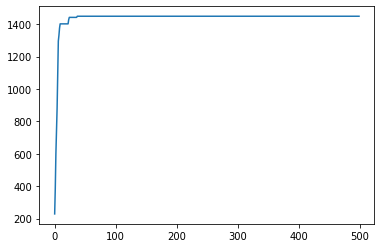

In [544]:
plt.plot(value_history)
print('最終重量: ' + str(weight) + '，最終價值: ' + str(value))
print('選擇: ' + str(result_arr))
print('答案: ' + str(ANS_ARR))

下圖為前 30 次迭代的結果

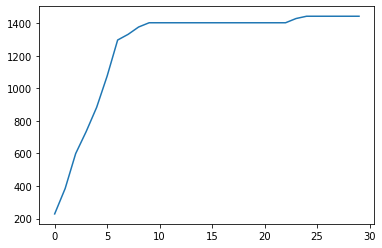

In [545]:
plt.plot(value_history[:30])

## 退火演算法

### Predefined Variables
- OBJ_COUNT: <font color="#fa0">const int</font>，物品的數量，根據讀檔結果得出
- ITERATIONS: <font color="#fa0">const int</font>，迭代次數，可以手動更改
- COEF:  <font color="#fa0">const float</font>，退火係數，可以手動更改
- t: <font color="#fa0">float</font>初始值，可以手動更改，每次迭代後將會把自己 * COEF，也就是說隨著迭代，t 的值會越來越小

In [538]:
OBJ_COUNT = len(ANS_ARR)
ITERATIONS = 500
COEF = 0.99
t = 150

### 演算法內容

In [539]:
result_arr = [0] * OBJ_COUNT  # 目前的選擇結果陣列
weight = 0  # 目前總重量
value = 0  # 目前總價值
value_history = []  # 記錄每次迭代後的價值
success = 0  # 記錄退火成功次數

for times in range(ITERATIONS):
  # 本次迭代結果不一定會比較好，所以先複製一組變數
  temp_result_arr = result_arr.copy()
  temp_weight = weight
  temp_value = value

  flag = True
  while (flag):
    # 隨機拿一個新的物品
    take_idx = random.randrange(OBJ_COUNT) # 抽到幾號物品
    if (temp_result_arr[take_idx] == 0):  # 若沒拿過就拿走
      temp_result_arr[take_idx] = 1
      temp_weight += OBJ_WEIGHT_ARR[take_idx]
      temp_value += OBJ_VALUE_ARR[take_idx]
    else: continue  # 若已經拿過，就需要重抽(重新跑 while 迴圈)
  
    # 如果物品總重 > 背包可承載重量，需隨機剔除一個物品，且剔除後總重需 <= 背包可承載重量
    if (temp_weight > CAPACITY):
      attempt = 0
      while (attempt < OBJ_COUNT):
        attempt += 1
        drop_idx = random.randrange(OBJ_COUNT) # 抽到幾號物品
        if (temp_result_arr[drop_idx] == 0): continue # 若抽到沒拿過的，就重抽
        elif (drop_idx == take_idx): continue # 若抽到剛放進去的，就重抽
        elif (temp_weight - OBJ_WEIGHT_ARR[drop_idx] > CAPACITY): continue # 若移除抽到的卻還是超載，就重抽
        else:
          temp_result_arr[drop_idx] = 0
          temp_weight -= OBJ_WEIGHT_ARR[drop_idx]
          temp_value -= OBJ_VALUE_ARR[drop_idx]
          flag = False  # 可以跳出大 while 迴圈了
          break
      if (flag): # 如果抽不到要移除的物品，那把剛拿到的也移除，重抽
        temp_result_arr[take_idx] = 0
        temp_weight -= OBJ_WEIGHT_ARR[take_idx]
        temp_value -= OBJ_VALUE_ARR[take_idx]
    else: flag = False  # 沒有丟東西的問題，可以跳出大 while 迴圈了

  # 若本次迭代結果優於目前，則可以取代，否則進入退火環節
  if (temp_value > value):
    result_arr = temp_result_arr.copy()
    weight = temp_weight
    value = temp_value
  else: 
    rand = random.random()
    r = math.exp((temp_value - value) / t)
    if (rand <= math.exp((temp_value - value) / t)):
      success += 1
      result_arr = temp_result_arr.copy()
      weight = temp_weight
      value = temp_value
  
  t *= COEF  # 降溫
  value_history.append(value)  # 記錄歷史資料

### 結果

退火成功次數: 92，最終重量: 749，最終價值: 1454
選擇: [0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1]
答案: [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]


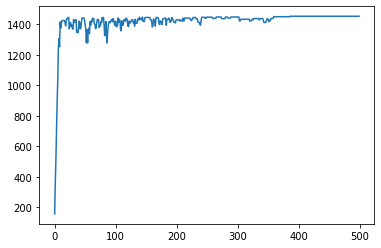

In [540]:
plt.plot(value_history)
print('退火成功次數: ' + str(success) + '，最終重量: ' + str(weight) + '，最終價值: ' + str(value))
print('選擇: ' + str(result_arr))
print('答案: ' + str(ANS_ARR))

下圖為第 21 次之後的迭代結果，這樣才能看到更詳細的退火變化

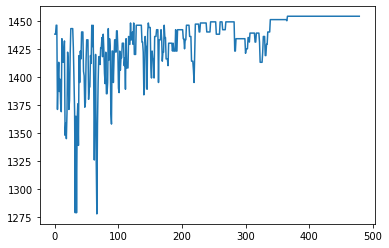

In [541]:
plt.plot(value_history[20:])